In [1]:
import numpy as np
import matplotlib.pyplot as plt

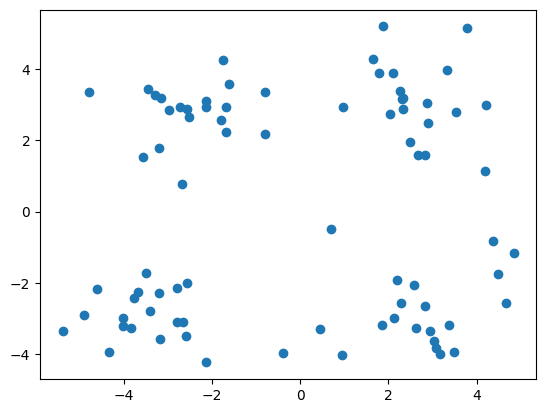

In [2]:
data = np.genfromtxt("kmeans.txt", delimiter = " ")

plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [8]:
def calDistance(vec1,vec2):
    return np.sqrt(sum((vec2 - vec1)**2))

def initCentroids(data, k):
    numSamples, dim = data.shape
    centroids = np.zeros((k, dim))
    for i in range(k):
        index = int(np.random.uniform(0, numSamples))
        centroids[i, :] = data[index, :]
    return centroids

def kmeans(data, k):
    numSamples = data.shape[0]
    # 样本属性，第一列保存该样本属于哪个蔟，第二列保存该样本跟它所属蔟的误差
    clusterData = np.array(np.zeros((numSamples, 2)))
    clusterChanged = True

    # 初始化质心
    centroids = initCentroids(data, k)

    while clusterChanged:
        clusterChanged = False
        for i in range(numSamples):
            minDist = 100000.0
            minIndex = 0
            for j in range(k):
                distance = calDistance(centroids[j, :], data[i, :])
                if distance < minDist:
                    minDist = distance
                    clusterData[i,1] = minDist
                    minIndex = j
            if clusterData[i, 0] != minIndex:
                clusterChanged = True
                clusterData[i, 0] = minIndex
        for j in range(k):
            cluster_index = np.nonzero(clusterData[:, 0] == j)
            # 第j个蔟所有的样本点
            pointsInCluster = data[cluster_index]
            centroids[j,:] = np.mean(pointsInCluster, axis=0) # 从列方向是，对每行的值，求一个平均值
    return centroids, clusterData       

def showCluster(data, k, centroids, clusterData):
    numSamples, dim = data.shape
    if dim != 2:
        print("dimension of your data is not 2!!! beyond the scope of drawing!")
        return 1
    mark = ['or','ob','og','ok','^r','+r', 'sr', 'dr', '<r', 'pr']
    if k > len(mark):
        print("Your k  is too large to be draw !")
        return 1
    for i in range(numSamples):
        markIdx = int(clusterData[i, 0])
        plt.plot(data[i, 0], data[i, 1], mark[markIdx])

    mark = ['*r','*b','*g','*k','^b','+b', 'sb', 'db', '<b', 'pb']

    for i in range(k):
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)

    plt.show()
    

Cluster complete!


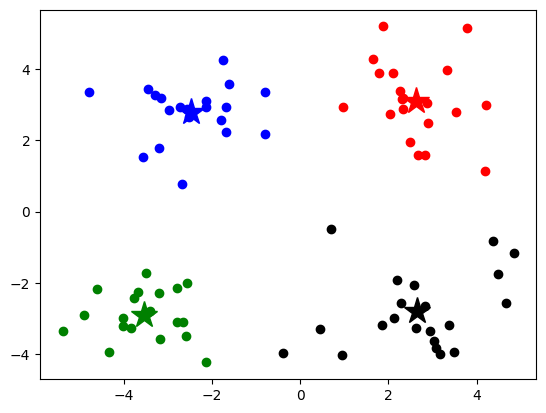

In [9]:
# setting k = 4
k = 4
centroids, clusterData = kmeans(data, k)
if np.isnan(centroids).any():
    print('Error')
else :
    print("Cluster complete!")
# show the results
showCluster(data, k, centroids, clusterData)

In [10]:
centroids 

array([[ 2.6265299 ,  3.10868015],
       [-2.46154315,  2.78737555],
       [-3.53973889, -2.89384326],
       [ 2.65077367, -2.79019029]])

## 做预测

In [13]:
x_test = [0, 1]
print((np.tile(x_test, (k, 1)) - centroids) ** 2)
np.argmin(((np.tile(x_test, (k, 1)) - centroids) ** 2).sum(axis = 1))  # 每列相加，求取最小值所在的下标

[[ 6.89865932  4.44653198]
 [ 6.05919468  3.19471136]
 [12.52975144 15.16201536]
 [ 7.02660103 14.3655424 ]]


1

In [14]:
def predict(datas):
    return np.array([np.argmin(((np.tile(data, (k, 1)) - centroids) ** 2).sum(axis = 1)) for data in datas])

画出蔟的作用区域

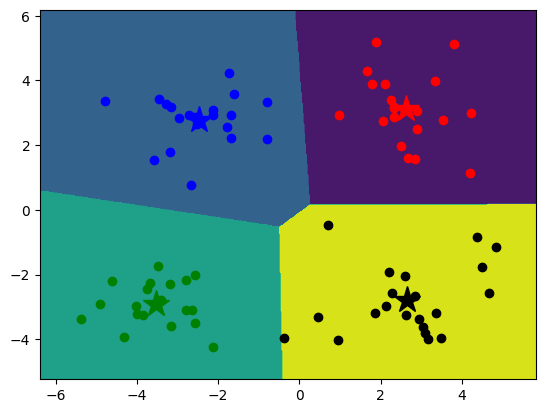

In [15]:
x_min, x_max = data[:, 0].min() - 1 , data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1 , data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# np.r_按row行来组合array,一行叠在一行后面，变成一个很长的一行
z = predict(np.c_[xx.ravel(), yy.ravel()]) # ravel和flatten类似，多维数据转一维，却会改变原始数据，最后变成[x,y],再进行预测
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)

showCluster(data, k, centroids, clusterData)